# CITS5508 - Lab5

### Henry Liu (22672083)

## Introduction 

This lab consists of a large project using the CIFAR-10 dataset. This is a data set containing 10 classes of colour images of size 32 × 32 pixels. The training set is perfectly balanced, with 6,000 images per class. The test set contains 10,000 instances. The task for this lab is to train an MLP and a CNN for the classification task and compare their performance. 

## Setup libraries and load data set

In [211]:
import os
import tarfile
import urllib.request
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import csv

In [212]:
import sys

In [213]:
sys.path

['/Users/liugensheng/OneDrive - The University of Western Australia/2022 sem1/CITS5508 ML/lab05',
 '/Users/liugensheng/miniconda3/lib/python39.zip',
 '/Users/liugensheng/miniconda3/lib/python3.9',
 '/Users/liugensheng/miniconda3/lib/python3.9/lib-dynload',
 '',
 '/Users/liugensheng/miniconda3/lib/python3.9/site-packages']

#### Step 1: Import the `DataLoader` class

In [214]:
from data_loader import DataLoader
import tensorflow as tf
from tensorflow import keras

#### Step 2: Call the `load_batch` function

In [215]:
# According to the CIFAR-10 website, the training set is split into five batches
# stored in fives files. Each colour image has dimensions equal to 32 x 32 x 3. There
# are 10 classes.
image_width, image_height, image_Nchannels = 32, 32, 3
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# The default values of all the arguments of the load_batch function have been
# set for the CIFAR-10 dataset.
X_train_full, y_train_full = DataLoader.load_batch('data_batch')
X_test, y_test = DataLoader.load_batch('test_batch', Nbatches=1)

In [216]:
X_train_full.shape

(50000, 32, 32, 3)

In [217]:
X_train_full.dtype

dtype('float32')

In [218]:
y_train_full.shape

(50000,)

In [219]:
y_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a smaller training set. We also scale the pixel intensities to the 0-1 range and convert them to floats.

In [220]:
X_valid, X_train = X_train_full[:7500], X_train_full[7500:]
y_valid, y_train = y_train_full[:7500], y_train_full[7500:]

In [221]:
X_valid.shape

(7500, 32, 32, 3)

In [222]:
y_train

array([3, 3, 0, ..., 9, 1, 1], dtype=uint8)

In [223]:
class_names[y_train[0]]

'cat'

In [224]:
img = X_train[0]
img

array([[[0.41568628, 0.4117647 , 0.43529412],
        [0.40784314, 0.40392157, 0.42745098],
        [0.40784314, 0.40392157, 0.42745098],
        ...,
        [0.29411766, 0.30588236, 0.3254902 ],
        [0.29803923, 0.3137255 , 0.33333334],
        [0.30588236, 0.31764707, 0.3372549 ]],

       [[0.4117647 , 0.40784314, 0.43137255],
        [0.41568628, 0.4117647 , 0.43529412],
        [0.4117647 , 0.40784314, 0.43137255],
        ...,
        [0.28627452, 0.29803923, 0.31764707],
        [0.29803923, 0.30980393, 0.32941177],
        [0.30588236, 0.31764707, 0.3372549 ]],

       [[0.4117647 , 0.40784314, 0.43137255],
        [0.42352942, 0.41960785, 0.44313726],
        [0.42745098, 0.42352942, 0.44705883],
        ...,
        [0.29411766, 0.30588236, 0.3254902 ],
        [0.3019608 , 0.3137255 , 0.33333334],
        [0.3137255 , 0.3254902 , 0.34509805]],

       ...,

       [[0.07450981, 0.07843138, 0.0627451 ],
        [0.07843138, 0.07843138, 0.06666667],
        [0.09411765, 0

In [225]:
img.shape

(32, 32, 3)

**We can check the pixel maxValue and minValue, then write a function**

In [226]:
maxValue = np.amax(img)
minValue = np.amin(img)

In [227]:
maxValue

0.96862745

In [228]:
minValue

0.023529412

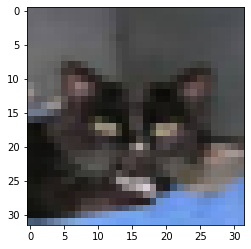

In [229]:
img = np.clip(img, 0, 1)
plt.imshow(img)

Let's take a look at a sample of the images in the dataset:

In [230]:
def display_image(X_train, y_train):
    n_rows = 2
    n_cols = 10
    plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
            plt.axis('off')
            plt.title(class_names[y_train[index]], fontsize=12)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.show()

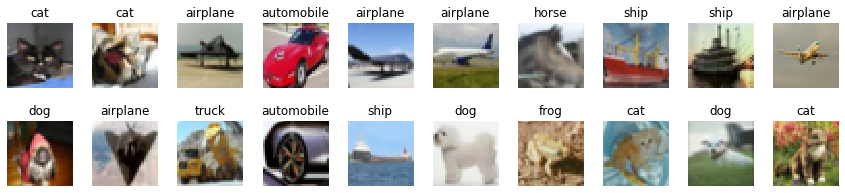

In [231]:
display_image(X_train, y_train)

### Implementation of an MLP

In [232]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [233]:
keras.backend.clear_session()
np.random.seed(1212)
tf.random.set_seed(1212)

In [234]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32,3]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [235]:
model.layers

In [236]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 300)               921900    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 953,010
Trainable params: 953,010
Non-trainable params: 0
_________________________________________________________________


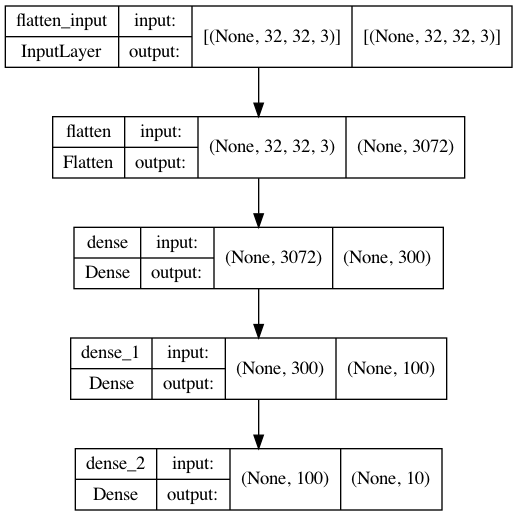

In [237]:
keras.utils.plot_model(model, "my_model.png", show_shapes=True)

**Make sure `test_set` is available and pixel in the range of `0 - 1`**

In [238]:
X_test = X_test 

In [239]:
X_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

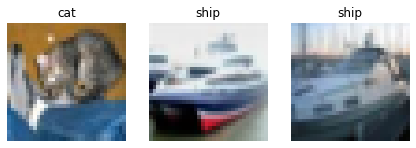

In [240]:
X_new = X_test[:3]
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [241]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [242]:
model.get_layer(hidden1.name) is hidden1

True

In [243]:
weights, biases = hidden1.get_weights()

In [244]:
weights

array([[ 0.00290778, -0.02502801, -0.00946325, ..., -0.0018251 ,
        -0.01746258, -0.04023496],
       [ 0.02503406, -0.00271341,  0.0404542 , ..., -0.02542598,
         0.01292249,  0.03839067],
       [-0.0173699 ,  0.04038252, -0.00562659, ...,  0.02842794,
        -0.00296566, -0.01260922],
       ...,
       [-0.03425898,  0.02725308,  0.00110051, ...,  0.03736731,
         0.02166724, -0.03108309],
       [ 0.00224173, -0.00497047, -0.02832862, ...,  0.02418069,
        -0.01491091, -0.03431574],
       [-0.02254697, -0.01831108,  0.00792268, ...,  0.04051621,
         0.00986737,  0.03238392]], dtype=float32)

In [245]:
weights.shape

(3072, 300)

In [246]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [247]:
biases.shape

(300,)

In [248]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [249]:

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))


Epoch 1/100
1329/1329 [==============================] - 6s 4ms/step - loss: 1.9011 - accuracy: 0.3183 - val_loss: 1.9214 - val_accuracy: 0.3039
Epoch 2/100
1329/1329 [==============================] - 6s 4ms/step - loss: 1.7245 - accuracy: 0.3869 - val_loss: 1.8740 - val_accuracy: 0.2995
Epoch 3/100
1329/1329 [==============================] - 5s 4ms/step - loss: 1.6420 - accuracy: 0.4182 - val_loss: 1.5946 - val_accuracy: 0.4280
Epoch 4/100
1329/1329 [==============================] - 6s 4ms/step - loss: 1.5827 - accuracy: 0.4372 - val_loss: 1.6100 - val_accuracy: 0.4208
Epoch 5/100
1329/1329 [==============================] - 6s 4ms/step - loss: 1.5422 - accuracy: 0.4543 - val_loss: 1.7508 - val_accuracy: 0.3620
Epoch 6/100
1329/1329 [==============================] - 6s 4ms/step - loss: 1.5057 - accuracy: 0.4661 - val_loss: 1.7002 - val_accuracy: 0.3943
Epoch 7/100
1329/1329 [==============================] - 5s 4ms/step - loss: 1.4734 - accuracy: 0.4769 - val_loss: 2.8419 - val_ac

1329/1329 [==============================] - 6s 4ms/step - loss: 0.7438 - accuracy: 0.7392 - val_loss: 3.4720 - val_accuracy: 0.2976
Epoch 58/100
1329/1329 [==============================] - 6s 4ms/step - loss: 0.7351 - accuracy: 0.7427 - val_loss: 1.9401 - val_accuracy: 0.4587
Epoch 59/100
1329/1329 [==============================] - 6s 4ms/step - loss: 0.7266 - accuracy: 0.7432 - val_loss: 3.8890 - val_accuracy: 0.2821
Epoch 60/100
1329/1329 [==============================] - 6s 4ms/step - loss: 0.7219 - accuracy: 0.7469 - val_loss: 2.1164 - val_accuracy: 0.4279
Epoch 61/100
1329/1329 [==============================] - 6s 4ms/step - loss: 0.7083 - accuracy: 0.7499 - val_loss: 2.7767 - val_accuracy: 0.3597
Epoch 62/100
1329/1329 [==============================] - 6s 4ms/step - loss: 0.6973 - accuracy: 0.7549 - val_loss: 1.7006 - val_accuracy: 0.5073
Epoch 63/100
1329/1329 [==============================] - 6s 4ms/step - loss: 0.6830 - accuracy: 0.7588 - val_loss: 2.7436 - val_accuracy

In [250]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
#model.save('Liu_gensheng-MLP.h5')

**find the optimal value**

In [251]:
'''
val_acc_per_epoch = model.history["accuracy"]
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))
'''
print('Best epoch: loss: 0.9352 - accuracy: 0.6723 - val_loss: 1.3965 - val_accuracy: 0.5272')

Best epoch: loss: 0.9352 - accuracy: 0.6723 - val_loss: 1.3965 - val_accuracy: 0.5272


In [252]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 1329}

In [253]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [254]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

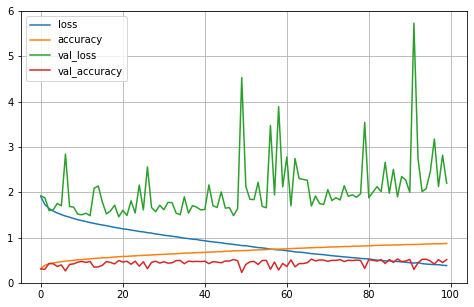

In [255]:

import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 6)
plt.show()


In [256]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.1992 - accuracy: 0.5081


[2.199247360229492, 0.5080999732017517]

In [257]:

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


array([[0.  , 0.  , 0.8 , 0.14, 0.03, 0.02, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  ],
       [0.68, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.26, 0.05]],
      dtype=float32)

In [258]:

#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred


array([2, 1, 0])

In [259]:
np.array(class_names)[y_pred]

array(['bird', 'automobile', 'airplane'], dtype='<U10')

In [260]:

y_new = y_test[:3]
y_new

array([3, 8, 8], dtype=uint8)

In [261]:
X_new.shape

(3, 32, 32, 3)

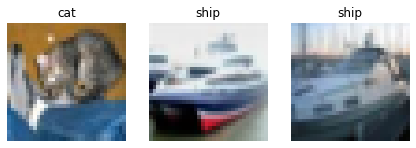

In [262]:

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()


In [263]:
'''
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
'''

'\nmodel = keras.models.Sequential([\n    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),\n    keras.layers.Dense(1)\n])\nmodel.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))\nhistory = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))\nmse_test = model.evaluate(X_test, y_test)\nX_new = X_test[:3]\ny_pred = model.predict(X_new)\n'

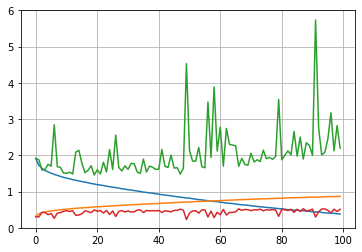

In [266]:

plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 6)
plt.show()


In [267]:
y_pred

array([2, 1, 0])

### Implementation of a CNN

In [55]:
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [56]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [57]:

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)


Epoch 1/100
1329/1329 [==============================] - 255s 191ms/step - loss: 1.8739 - accuracy: 0.2900 - val_loss: 1.5117 - val_accuracy: 0.4367
Epoch 2/100
1329/1329 [==============================] - 259s 195ms/step - loss: 1.5092 - accuracy: 0.4478 - val_loss: 1.3863 - val_accuracy: 0.4957
Epoch 3/100
1329/1329 [==============================] - 261s 197ms/step - loss: 1.3418 - accuracy: 0.5238 - val_loss: 1.1695 - val_accuracy: 0.5784
Epoch 4/100
1329/1329 [==============================] - 263s 198ms/step - loss: 1.2141 - accuracy: 0.5755 - val_loss: 1.0880 - val_accuracy: 0.6164
Epoch 5/100
1329/1329 [==============================] - 258s 194ms/step - loss: 1.1172 - accuracy: 0.6144 - val_loss: 1.0168 - val_accuracy: 0.6489
Epoch 6/100
1329/1329 [==============================] - 259s 195ms/step - loss: 1.0580 - accuracy: 0.6408 - val_loss: 1.0134 - val_accuracy: 0.6533
Epoch 7/100
1329/1329 [==============================] - 256s 193ms/step - loss: 0.9955 - accuracy: 0.6653

Epoch 56/100
1329/1329 [==============================] - 252s 190ms/step - loss: 0.4474 - accuracy: 0.8807 - val_loss: 1.6411 - val_accuracy: 0.7152
Epoch 57/100
1329/1329 [==============================] - 253s 190ms/step - loss: 0.4216 - accuracy: 0.8887 - val_loss: 1.4939 - val_accuracy: 0.7169
Epoch 58/100
1329/1329 [==============================] - 253s 190ms/step - loss: 0.4234 - accuracy: 0.8883 - val_loss: 1.6568 - val_accuracy: 0.6948
Epoch 59/100
1329/1329 [==============================] - 253s 191ms/step - loss: 0.4160 - accuracy: 0.8903 - val_loss: 1.5587 - val_accuracy: 0.7089
Epoch 60/100
1329/1329 [==============================] - 253s 190ms/step - loss: 0.4316 - accuracy: 0.8855 - val_loss: 1.6171 - val_accuracy: 0.7031
Epoch 61/100
1329/1329 [==============================] - 252s 190ms/step - loss: 0.4189 - accuracy: 0.8903 - val_loss: 1.6363 - val_accuracy: 0.7129
Epoch 62/100
1329/1329 [==============================] - 253s 190ms/step - loss: 0.4398 - accuracy:

In [82]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('Liu_gensheng-CNN.h5')

In [59]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 1329}

In [60]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [61]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

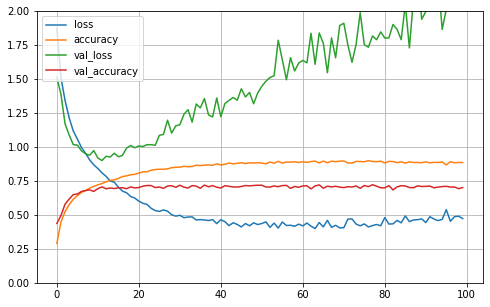

In [63]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In [64]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 12s 38ms/step - loss: 2.1589 - accuracy: 0.6988


[2.158931255340576, 0.6988000273704529]

In [65]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.05, 0.03, 0.09, 0.23, 0.11, 0.32, 0.05, 0.07, 0.01, 0.05],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ]],
      dtype=float32)

In [66]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([5, 8, 8])

In [67]:
np.array(class_names)[y_pred]

array(['dog', 'ship', 'ship'], dtype='<U10')

In [68]:
y_new = y_test[:3]
y_new

array([3, 8, 8], dtype=uint8)

In [73]:
X_new.shape

(3, 32, 32, 3, 1)

In [75]:
'''
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()
'''

'\nplt.figure(figsize=(7.2, 2.4))\nfor index, image in enumerate(X_new):\n    plt.subplot(1, 3, index + 1)\n    plt.imshow(image, cmap="binary", interpolation="nearest")\n    plt.axis(\'off\')\n    plt.title(class_names[y_test[index]], fontsize=12)\nplt.subplots_adjust(wspace=0.2, hspace=0.5)\nplt.show()\n'

## Mean Average Precision (mAP)

In [76]:
def maximum_precisions(precisions):
    return np.flip(np.maximum.accumulate(np.flip(precisions)))

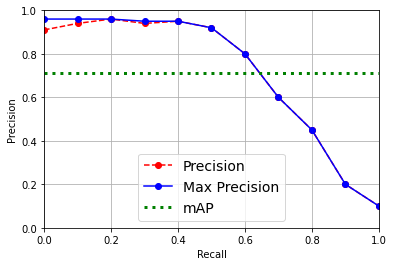

In [77]:
recalls = np.linspace(0, 1, 11)

precisions = [0.91, 0.94, 0.96, 0.94, 0.95, 0.92, 0.80, 0.60, 0.45, 0.20, 0.10]
max_precisions = maximum_precisions(precisions)
mAP = max_precisions.mean()
plt.plot(recalls, precisions, "ro--", label="Precision")
plt.plot(recalls, max_precisions, "bo-", label="Max Precision")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot([0, 1], [mAP, mAP], "g:", linewidth=3, label="mAP")
plt.grid(True)
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower center", fontsize=14)
plt.show()

In [79]:
model_MLP = keras.models.load_model("Liu_gensheng-MLP.h5")

In [83]:
model_CNN = keras.models.load_model("Liu_gensheng-CNN.h5")

In [84]:
model_MLP.predict(X_new)

array([[3.68573815e-02, 5.26128784e-02, 3.21993344e-02, 6.58592463e-01,
        1.76914539e-02, 6.72106445e-02, 7.93746188e-02, 2.01507448e-03,
        3.81240696e-02, 1.53221553e-02],
       [1.42742903e-03, 6.68037832e-01, 2.45524143e-06, 1.12167028e-04,
        1.02484246e-05, 3.63500885e-06, 2.28303247e-06, 2.12333339e-06,
        5.36492541e-02, 2.76752472e-01],
       [9.61185545e-02, 4.26176876e-01, 6.45912485e-04, 5.19137690e-03,
        9.38380254e-05, 9.41015896e-05, 1.04888095e-05, 1.55799103e-03,
        3.84353787e-01, 8.57570767e-02]], dtype=float32)

In [85]:
model_CNN.predict(X_new)

array([[4.79343608e-02, 2.80607920e-02, 8.53786841e-02, 2.30304137e-01,
        1.07314974e-01, 3.17494184e-01, 4.94939573e-02, 7.31523484e-02,
        1.25423539e-02, 4.83241379e-02],
       [8.22836157e-13, 4.47706298e-13, 1.76104344e-15, 3.12160214e-10,
        7.54281787e-22, 2.65352923e-16, 5.86986772e-31, 1.97169400e-32,
        1.00000000e+00, 1.44435092e-16],
       [9.74555506e-12, 6.88361217e-12, 6.67813678e-13, 4.17178514e-09,
        3.64726680e-18, 8.03391184e-15, 3.89422534e-27, 1.63534879e-29,
        1.00000000e+00, 7.68264440e-14]], dtype=float32)

In [109]:
model_MLP.evaluate(X_valid, y_valid)

235/235 [==============================] - 1s 2ms/step - loss: 2.2595 - accuracy: 0.3237


[2.2595458030700684, 0.3237333297729492]

In [110]:
model_CNN.evaluate(X_valid, y_valid)

235/235 [==============================] - 9s 38ms/step - loss: 2.0097 - accuracy: 0.7009


[2.0097315311431885, 0.7009333372116089]

#### Comparision (accuracy, F1 score, precision per class etc.)

In [114]:
model_MLP.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1329/1329 [==============================] - 277s 209ms/step - loss: 0.5041 - accuracy: 0.8772 - val_loss: 1.7268 - val_accuracy: 0.6555
Epoch 2/20
1329/1329 [==============================] - 275s 207ms/step - loss: 0.5096 - accuracy: 0.8761 - val_loss: 2.0466 - val_accuracy: 0.6960
Epoch 3/20
1329/1329 [==============================] - 271s 204ms/step - loss: 0.4919 - accuracy: 0.8748 - val_loss: 2.3165 - val_accuracy: 0.6964
Epoch 4/20
1329/1329 [==============================] - 267s 201ms/step - loss: 0.5884 - accuracy: 0.8580 - val_loss: 1.8246 - val_accuracy: 0.7003
Epoch 5/20
1329/1329 [==============================] - 265s 199ms/step - loss: 0.5112 - accuracy: 0.8729 - val_loss: 2.1352 - val_accuracy: 0.7088
Epoch 6/20
1329/1329 [==============================] - 272s 204ms/step - loss: 0.4750 - accuracy: 0.8850 - val_loss: 2.3231 - val_accuracy: 0.7020
Epoch 7/20
1329/1329 [==============================] - 272s 204ms/step - loss: 0.5309 - accuracy: 0.8748 - val_

In [115]:
model_CNN.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1329/1329 [==============================] - 258s 194ms/step - loss: 0.6559 - accuracy: 0.8385 - val_loss: 2.0219 - val_accuracy: 0.6444
Epoch 2/20
1329/1329 [==============================] - 263s 198ms/step - loss: 0.5928 - accuracy: 0.8559 - val_loss: 2.1518 - val_accuracy: 0.6924
Epoch 3/20
1329/1329 [==============================] - 262s 197ms/step - loss: 0.5531 - accuracy: 0.8665 - val_loss: 2.2296 - val_accuracy: 0.6855
Epoch 4/20
1329/1329 [==============================] - 262s 197ms/step - loss: 0.6741 - accuracy: 0.8350 - val_loss: 2.2382 - val_accuracy: 0.6812
Epoch 5/20
1329/1329 [==============================] - 263s 198ms/step - loss: 0.6521 - accuracy: 0.8465 - val_loss: 1.8071 - val_accuracy: 0.6739
Epoch 6/20
1329/1329 [==============================] - 264s 199ms/step - loss: 0.5820 - accuracy: 0.8576 - val_loss: 2.1585 - val_accuracy: 0.6837
Epoch 7/20
1329/1329 [==============================] - 264s 199ms/step - loss: 0.5968 - accuracy: 0.8575 - val_

In [118]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

In [167]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    #plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "bo-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "rx-", label="Forecast", markersize=10)
    plt.axis([30, n_steps + ahead, 0, 0.5])
    plt.legend(fontsize=14)

In [185]:
X_new = X_test[:3]
X_new

array([[[[[ 0.3739076 ],
          [-0.33011237],
          [-1.0400838 ]],

         [[ 0.40058714],
          [-0.3401506 ],
          [-1.067562  ]],

         [[ 0.472345  ],
          [-0.2822825 ],
          [-1.0281082 ]],

         ...,

         [[ 0.08467738],
          [-0.5749087 ],
          [-1.2137326 ]],

         [[-0.05874097],
          [-0.6202519 ],
          [-1.2055414 ]],

         [[-0.19203578],
          [-0.6954838 ],
          [-1.2364224 ]]],


        [[[ 0.30383423],
          [-0.32287005],
          [-1.0072231 ]],

         [[ 0.30333358],
          [-0.3432331 ],
          [-1.1437994 ]],

         [[ 0.4049644 ],
          [-0.29781377],
          [-1.0920568 ]],

         ...,

         [[ 0.08656385],
          [-0.5652714 ],
          [-1.2681274 ]],

         [[-0.05756362],
          [-0.61033666],
          [-1.2452983 ]],

         [[-0.1380765 ],
          [-0.6460799 ],
          [-1.2152878 ]]],


        [[[ 0.29832983],
          [-0.344

In [186]:
X_new_1 = X_test[:-10]
X_new_1

array([[[[[ 0.3739076 ],
          [-0.33011237],
          [-1.0400838 ]],

         [[ 0.40058714],
          [-0.3401506 ],
          [-1.067562  ]],

         [[ 0.472345  ],
          [-0.2822825 ],
          [-1.0281082 ]],

         ...,

         [[ 0.08467738],
          [-0.5749087 ],
          [-1.2137326 ]],

         [[-0.05874097],
          [-0.6202519 ],
          [-1.2055414 ]],

         [[-0.19203578],
          [-0.6954838 ],
          [-1.2364224 ]]],


        [[[ 0.30383423],
          [-0.32287005],
          [-1.0072231 ]],

         [[ 0.30333358],
          [-0.3432331 ],
          [-1.1437994 ]],

         [[ 0.4049644 ],
          [-0.29781377],
          [-1.0920568 ]],

         ...,

         [[ 0.08656385],
          [-0.5652714 ],
          [-1.2681274 ]],

         [[-0.05756362],
          [-0.61033666],
          [-1.2452983 ]],

         [[-0.1380765 ],
          [-0.6460799 ],
          [-1.2152878 ]]],


        [[[ 0.29832983],
          [-0.344

In [268]:
Y_pred_MLP = model_MLP.predict(X_new)[..., np.newaxis]

In [269]:
Y_pred_CNN = model_CNN.predict(X_new_1)[..., np.newaxis]

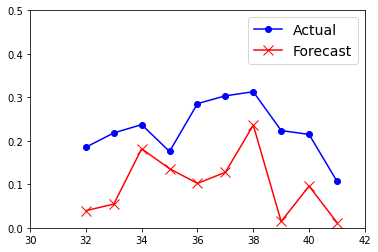

In [270]:
plot_multiple_forecasts(X_new, Y_new, Y_pred_MLP)
plt.show()

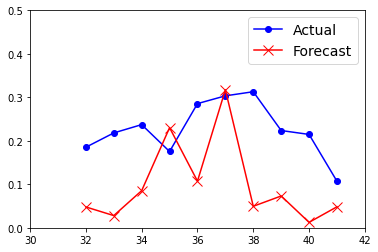

In [271]:
plot_multiple_forecasts(X_new, Y_new, Y_pred_CNN)
plt.show()

In [89]:
def f1(p, r):
    return 2 * ((p*r)/(p+r))

In [99]:
precisions_MLP = []
recalls_MLP = []
precisions_CNN = []
recalls_CNN = []

In [100]:
import numpy as np
for ii in np.arange(0.01, 1.0, 0.01):
    precisions_MLP.append(ii)
precisions_MLP.append(1.0)

In [101]:
for ii in np.arange(0.01, 1.0, 0.01):
    recalls_MLP.append(ii)
recalls_MLP.append(1.0)

In [103]:
#precisions

In [106]:
f1_scores_MLP = []
for p, r in zip(precisions_MLP, recalls_MLP):
    f1_scores_MLP.append(f1(p,r))

In [108]:
#f1_scores_MLP

In [279]:
from sklearn.metrics import f1_score
y_new

array([3, 8, 8], dtype=uint8)

In [277]:
y_pred

array([2, 1, 0])

In [281]:
from sklearn.metrics import accuracy_score
import numpy as np
#accuracy_score(y_test, y_pred)
accuracy_score(y_new, y_pred, normalize=False)

#accuracy_score(np.array([[0, 1], [1, 1]]), np.ones((2, 2)))

0

#### Show right images and wrong images

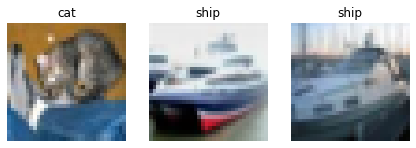

In [282]:

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [296]:
X_new_1 = X_test[-3:]

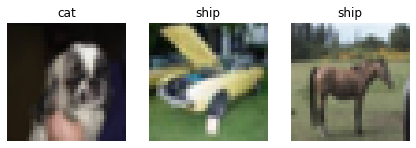

In [297]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new_1):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()